<h2>Importing the libraries

In [88]:
import numpy as np
import pickle 

<h2>Reading all the datas provided in the data set

In [89]:
with open('test_image.pkl', 'rb') as q:
    test_data = pickle.load(q)
with open('train_image.pkl', 'rb') as q:
    train_data = pickle.load(q)
with open('train_label.pkl', 'rb') as q:
    train_label = pickle.load(q)

<h2>Resolving all the data to numpy array

In [90]:
test_data = np.array(test_data)
train_data = np.array(train_data)
train_label = np.array(train_label)
print("test data :", test_data.shape)
print("train data :", train_data.shape)
print("train label :", train_label.shape)

test data : (2000, 784)
train data : (8000, 784)
train label : (8000,)


<h2>Changing the shape of the data</h2>

In [91]:
train_x = train_data.reshape(len(train_data), 28,28)
train_y = train_label
test_x = test_data.reshape(len(test_data), 28,28)
print(train_x.shape,train_y.shape, test_x.shape)

(8000, 28, 28) (8000,) (2000, 28, 28)


<h2>Normalisation to be done for keeping the value between 0 AND 1

In [92]:
train_x = train_x /255.0
test_x = test_x / 255.0

<h2>Plotting the training data with labels</h2>

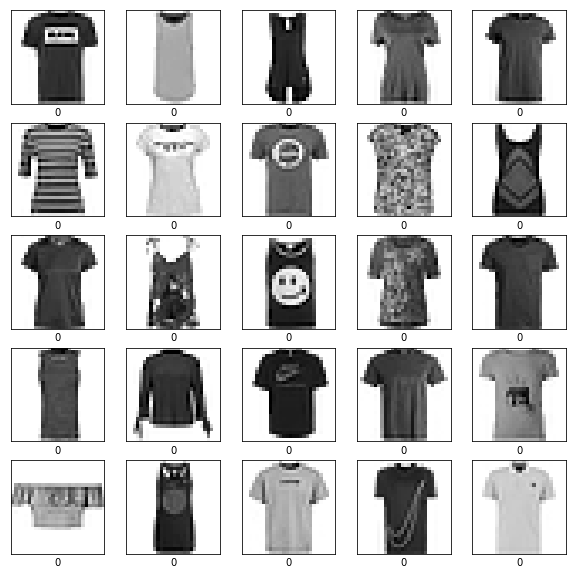

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i]) # Get the labels as per index

<h2>Model Definition and Description</h2>

In [94]:
import keras
import tensorflow as tf

<b>1:</b> Flatten the image array to 1-D array <b>keras.layers.Flatten</b>

<b>2:</b> Map it to a hidden layer which has 128 neurons and sigmoid as activation function

<b>3:</b> Map the hidden layer to the output layer that has 7 output neurons, because the given train_label = (0,2,3,6) so the model takes the max value of labels as the number of assuming it has started from 0. And it gives an array having the probability distributions of classes.




In [95]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(7,activation=tf.nn.softmax)
                         
])

<h2>Compile the model</h2><br>
Here <b>Adam optimizer</b> is used as the optimization algorithm  and <b>categorical crossentropy</b> as the loss function.

In [96]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

<h2>Fitting the data</h2>

In [97]:
model.fit(train_x, train_label, epochs = 30)

Epoch 1/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.6758 - acc: 0.7360
Epoch 2/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.5207 - acc: 0.7995
Epoch 3/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4792 - acc: 0.8114
Epoch 4/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4568 - acc: 0.8189
Epoch 5/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4397 - acc: 0.8267
Epoch 6/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.4196 - acc: 0.8353
Epoch 7/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.4080 - acc: 0.8400
Epoch 8/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.3955 - acc: 0.8433
Epoch 9/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.3842 - acc: 0.8494
Epoch 10/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.3765 - acc: 0.8516
Epoch 11/30
8000/80

<h2>Prediction</h2>

In [98]:
prediction = model.predict(test_x)

prediction

array([[9.3880671e-01, 4.1989588e-07, 1.1338450e-03, ..., 2.2715933e-07,
        1.0558532e-07, 5.8861252e-02],
       [6.4457780e-01, 1.7613701e-06, 1.5043006e-02, ..., 9.7668828e-07,
        5.4653651e-07, 2.5099692e-01],
       [9.3512344e-01, 1.0133596e-06, 7.5466240e-05, ..., 1.0112935e-06,
        2.8445737e-07, 6.4774118e-02],
       ...,
       [1.8430333e-01, 8.4270766e-07, 1.0430663e-02, ..., 8.0780359e-07,
        4.0954168e-07, 5.8989030e-01],
       [2.0711213e-04, 1.5996183e-07, 2.4924600e-02, ..., 3.7031765e-07,
        1.2445345e-07, 9.7485274e-01],
       [1.3584296e-04, 4.4818744e-08, 9.6470362e-04, ..., 7.4051357e-08,
        5.1387296e-08, 9.9865782e-01]], dtype=float32)

<h2>Getting the predicted classes of the test data

In [116]:
final_out = []
for index,predict in enumerate (prediction):
    output = []
    output.append(index)
    output.append(np.argmax(predict))
    final_out.append(output)    

In [117]:
final_out=np.array(final_out).tolist()
final_out

[[0, 0],
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [7, 0],
 [8, 0],
 [9, 0],
 [10, 0],
 [11, 0],
 [12, 6],
 [13, 0],
 [14, 0],
 [15, 6],
 [16, 0],
 [17, 6],
 [18, 0],
 [19, 0],
 [20, 0],
 [21, 0],
 [22, 0],
 [23, 0],
 [24, 0],
 [25, 0],
 [26, 6],
 [27, 0],
 [28, 0],
 [29, 0],
 [30, 0],
 [31, 0],
 [32, 0],
 [33, 0],
 [34, 3],
 [35, 0],
 [36, 0],
 [37, 3],
 [38, 0],
 [39, 6],
 [40, 6],
 [41, 0],
 [42, 0],
 [43, 0],
 [44, 0],
 [45, 0],
 [46, 0],
 [47, 2],
 [48, 0],
 [49, 0],
 [50, 0],
 [51, 0],
 [52, 0],
 [53, 0],
 [54, 0],
 [55, 0],
 [56, 0],
 [57, 0],
 [58, 0],
 [59, 0],
 [60, 3],
 [61, 3],
 [62, 0],
 [63, 0],
 [64, 3],
 [65, 0],
 [66, 0],
 [67, 0],
 [68, 0],
 [69, 0],
 [70, 0],
 [71, 0],
 [72, 0],
 [73, 0],
 [74, 6],
 [75, 0],
 [76, 0],
 [77, 0],
 [78, 6],
 [79, 0],
 [80, 0],
 [81, 0],
 [82, 0],
 [83, 0],
 [84, 0],
 [85, 0],
 [86, 0],
 [87, 0],
 [88, 0],
 [89, 0],
 [90, 0],
 [91, 3],
 [92, 0],
 [93, 0],
 [94, 0],
 [95, 0],
 [96, 0],
 [97, 6],
 [98, 6],
 [99, 6],
 [100, 0],

<h2>Adding output to .csv file</h2>

In [120]:
np.savetxt("vishalananddash.csv",final_out,delimiter=",")